In [26]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

#reading directly off web
url='https://www.sipri.org/sites/default/files/SIPRI-Milex-data-1949-2017.xlsx'

#using read_excel routine with settings as follow: 
#sheet_name is name of excel file at web source
#header set to 5, meaning row in spread sheet set up for YEAR columns
#usecols set to pick first column, then skip several that have info not needed for the exercise, then select range
#index_col = none ..this works to give clear lising of countries in col A


#per_country miltary spending
per_country = pd.read_excel(url,sheet_name='Current USD', header=5,
                    usecols='A,BL:BS', index_col=None,  na_values=['NA'])

#per person miltary spending
per_person=pd.read_excel(url,sheet_name='Per capita', header=6,
                    usecols='A,Y:AF', index_col=None,  na_values=['NA'])

#per_country spending as share of gdp
per_country_share_gdp = pd.read_excel(url,sheet_name='Share of GDP', header=5,
                    usecols='A,BL:BS', index_col=None,  na_values=['NA'])
                                                  
#initialize variables showing source data dimensions for later use
per_country_numrows=len(per_country.index)
per_country_numcols=len(per_country.columns)

per_person_numrows=len(per_person.index)
per_person_numcols=len(per_person.columns)


per_country_share_gdp_numrows=len(per_country_share_gdp.index)
per_country_share_gdp_numcols=len(per_country_share_gdp.columns)

#list of countries to examine 
country_list = ('USA', 'China, P.R.','Russian Federation', 'USSR/Russia',
                'Germany','UK', 'France', 'Italy', 'Saudi Arabia', 
                'Korea, South', 'Israel')


#Get a list of the country names from the dataframes for each different excel sheet
world_countries_per_country = per_country.iloc[:,0]
world_countries_per_person = per_person.iloc[:,0]
world_countries_per_country_share_gdp = per_country_share_gdp.iloc[:,0]

        
#spin through country names (column 0) compare value to country list and
#drop any rows from dataframe that do not pertain to countries in country list
#inplace set to true commitd chanages to thee data frame immeciately

#per_country miltary spending
for i in range(0,per_country_numrows):  #This block works 
    if world_countries_per_country[i] not in country_list: #works
        per_country.drop([i],axis=0,inplace=True)  
        
#per_capita military spending        
for i in range(0,per_person_numrows):  #This block works 
    if world_countries_per_person[i] not in country_list: #works
        per_person.drop([i],axis=0,inplace=True)
        
#per_country_share_gdp       
for i in range(0,per_country_share_gdp_numrows):  #This block works 
    if world_countries_per_country_share_gdp[i] not in country_list: #works
        per_country_share_gdp.drop([i],axis=0,inplace=True) 
            

#since not all dataframes have same default indexes (row values), 
#resetting index to Country; Russia has 2 values so handle that below 
per_country.set_index('Country', inplace=True)
per_country_share_gdp.set_index('Country', inplace=True)
per_person.set_index('Country', inplace=True)

#need to rename USSR/Russia, value found in per_capita sheet, to align
#with other data frames, i.e. Russian Federation
#use rename method passign a dictionary
#must be done AFTER setting key to country
per_person.rename(index={'USSR/Russia':'Russian Federation'}, inplace=True)

#Below are calculated values; saved here but commented out; run in lower frames

#per_country miltary spending divided by share of GDP = GDP
#gdp = per_country.iloc[:,0:]/per_country_share_gdp.iloc[:,0:]
#gdp

#per_country miltary spending divided by military spending per person (per capita miltary
#expediture) will yield the popuation
#pop = per_country.iloc[:,0:]/per_person.iloc[:,0:]
#pop

#Now with population and gdp, we can derive gdp per person
#per_person_gdp = gdp/pop
#per_person_gdp



In [13]:
#per_country miltary spending divided by share of GDP = GDP
#format to two decimals

pd.options.display.float_format='{:,.2f}'.format
gdp = per_country.iloc[:,0:]/per_country_share_gdp.iloc[:,0:]
#Set the name of the columns
gdp.columns.name= 'Years'
gdp['Average']=0

for i in range(0,len(country_list)-1):
    gdp.iloc[i,8] =gdp.iloc[i].sum()/8

    
gdp = gdp.sort_values(by='Average', ascending=False)

gdp



Years,2010,2011,2012,2013,2014,2015,2016,2017,Average
Country,,,,,,,,,
USA,"14,964,400.00","15,517,900.00","16,155,300.00","16,691,500.00","17,427,600.00","18,120,700.00","18,624,500.00","19,362,180.98","17,108,010.12"
"China, P.R.","6,100,647.39","7,572,601.24","8,560,506.18","9,607,286.27","10,482,320.14","11,064,684.92","11,189,814.88","11,956,480.23","9,566,792.66"
Germany,"3,417,094.35","3,757,699.61","3,543,982.09","3,752,514.41","3,890,607.08","3,375,457.47","3,476,993.75","3,633,143.06","3,605,936.48"
UK,"2,429,681.74","2,608,823.97","2,646,002.59","2,719,507.68","3,000,955.05","2,861,090.73","2,617,035.04","2,572,059.67","2,681,894.56"
France,"2,646,836.94","2,862,681.15","2,681,414.74","2,808,511.88","2,849,305.46","2,433,451.26","2,464,885.05","2,561,608.28","2,663,586.85"
Italy,"2,125,058.11","2,276,293.21","2,072,822.10","2,130,491.84","2,151,732.97","1,832,264.06","1,858,484.21","1,920,524.95","2,045,958.93"
Russian Federation,"1,538,697.11","2,031,771.42","2,171,743.80","2,240,113.14","2,063,662.28","1,369,078.94","1,258,146.50","1,556,257.35","1,778,683.82"
"Korea, South","1,094,500.29","1,202,465.96","1,222,808.15","1,305,608.44","1,411,335.00","1,382,764.03","1,410,616.83","1,532,449.01","1,320,318.46"
Saudi Arabia,"526,811.47","669,506.67","733,955.73","744,336.22","753,831.64","646,001.87","642,738.67","674,657.91","673,980.02"


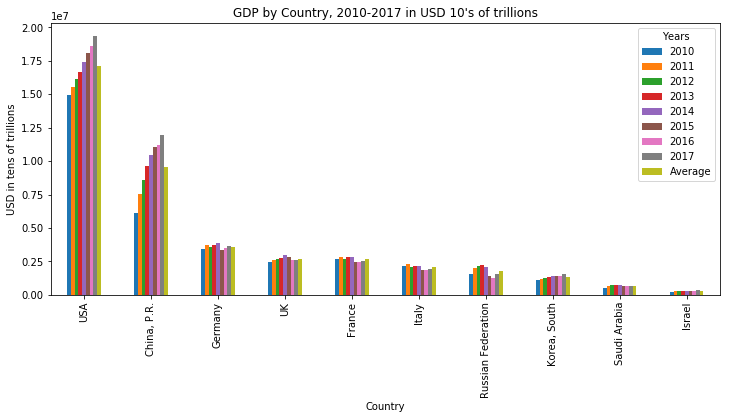

In [27]:
#plotting the gdp as bar plot, set the y label and figure size

gdp.plot(kind='bar', title = "GDP by Country, 2010-2017 in USD 10's of trillions", figsize=[12,5])



plt.ylabel('USD in tens of trillions')
plt.show()

In [15]:
#This block for comparing overall military spending of all 10 countries, in absolute 
#pd.options.display.float_format='{:,.2f}'.format

per_country.columns.name = 'Years'

#per_country

#add a column called Average, pop it with default

per_country['Average'] = 0

#calculate average for each row (which is data per country) and put into Average Column
#tried using mean but values were wrong, so used sum/8 
#8 is number of data points per row; nicer if not hard coded

for i in range(0,len(country_list)-1):
    per_country.iloc[i,8] = per_country.iloc[i].sum()/8

pd.options.display.float_format='{:,.2f}'.format   

#displaying military expenditure per country putting highest average per period at top 
#and descending down

per_country=per_country.sort_values(by='Average', ascending=False)
per_country
          

Years,2010,2011,2012,2013,2014,2015,2016,2017,Average
Country,,,,,,,,,
USA,698180,711338,684780,639704,609914,"596,104.64","600,106.44","609,757.98","643,735.63"
"China, P.R.","115,711.78","137,967.30","157,390.38","179,880.45","200,772.20","214,093.07","216,031.28","228,230.67","181,259.64"
Russian Federation,"58,720.23","70,237.52","81,469.40","88,352.90","84,696.50","66,418.71","69,245.31","66,334.99","73,184.44"
Saudi Arabia,"45,244.53","48,530.93","56,497.87",67020,"80,762.40","87,185.87","63,672.80","69,413.33","64,790.97"
France,"61,781.75","64,600.93","60,035.15","62,417.10","63,613.57","55,342.13","57,358.41","57,770.12","60,364.90"
UK,"58,082.85","60,270.44","58,495.66","56,861.76","59,182.86","53,862.19","48,118.94","47,193.10","55,258.47"
Germany,"46,255.52","48,140.35","46,470.87","45,930.54","46,102.67","39,812.58","41,579.49","44,329.28","44,827.66"
"Korea, South","28,175.18","30,991.71","31,951.76","34,136.64","37,552.33","36,570.77","36,934.45","39,152.50","34,433.17"
Italy,"36,032.29","38,129.99","33,732.75","33,891.91","31,572.44","25,294.63","28,205.84","29,236.39","32,012.03"


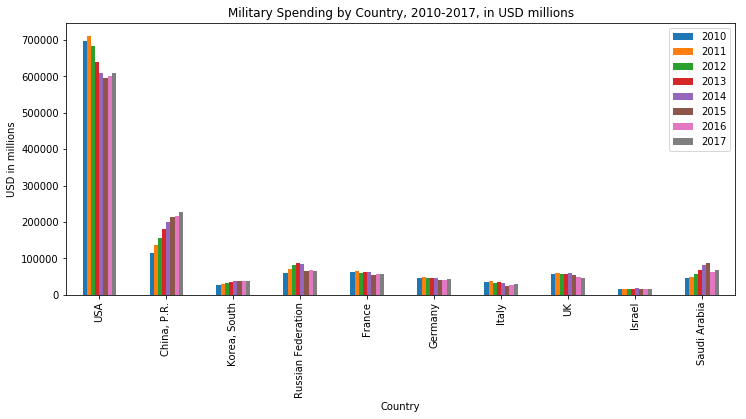

In [28]:
per_country.plot(kind='bar', title = 'Military Spending by Country, 2010-2017, in USD millions', figsize=[12,5])
plt.ylabel('USD in millions')
plt.show()

In [29]:
#Miltary spending as per cent of GDP

per_country_share_gdp.columns.name = 'Years'
#need a method to order values; may want to take average
#also see popular names for ideas

pd.options.display.float_format='{:,.4f}'.format  
per_country_share_gdp['Average']=0
for i in range(0,len(country_list)-1):
    per_country_share_gdp.iloc[i,8] = per_country_share_gdp.iloc[i].sum()/8
    
per_country_share_gdp =per_country_share_gdp.sort_values(by='Average', ascending=False)
per_country_share_gdp


Years,2010,2011,2012,2013,2014,2015,2016,2017,Average
Country,,,,,,,,,
Saudi Arabia,0.0859,0.0725,0.0770,0.0900,0.1071,0.1350,0.0991,0.1029,0.0962
Israel,0.0624,0.0624,0.0604,0.0592,0.0599,0.0567,0.0465,0.0473,0.0568
Russian Federation,0.0382,0.0346,0.0375,0.0394,0.0410,0.0485,0.0550,0.0426,0.0421
USA,0.0467,0.0458,0.0424,0.0383,0.0350,0.0329,0.0322,0.0315,0.0381
"Korea, South",0.0257,0.0258,0.0261,0.0261,0.0266,0.0264,0.0262,0.0255,0.0261
France,0.0233,0.0226,0.0224,0.0222,0.0223,0.0227,0.0233,0.0226,0.0227
UK,0.0239,0.0231,0.0221,0.0209,0.0197,0.0188,0.0184,0.0183,0.0207
"China, P.R.",0.0190,0.0182,0.0184,0.0187,0.0192,0.0193,0.0193,0.0191,0.0189
Italy,0.0170,0.0168,0.0163,0.0159,0.0147,0.0138,0.0152,0.0152,0.0156


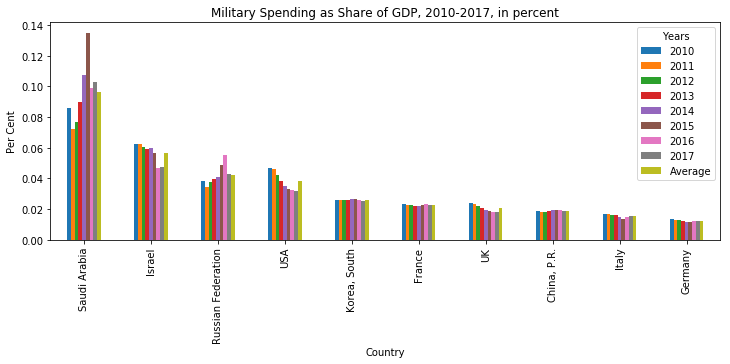

In [30]:
per_country_share_gdp.plot(kind='bar', title='Military Spending as Share of GDP, 2010-2017, in percent', figsize=[12,4])
plt.ylabel('Per Cent')
plt.show()

In [19]:
#Here would be good to do a stacked bar showing military spending stacked with gdp


In [31]:
#WE NEED POPULATION, to calculate per person data
#population was not part of the data on source spread sheet, but it can be calculated 
#per_country miltary spending divided by military spending per person (per capita miltary
#expediture) will yield the popuation

pop = per_country.iloc[:,0:]/per_person.iloc[:,0:]
pop['Average']=0

#be sure to divide by 8 this time
for i in range(0,len(country_list)-1):
    pop.iloc[i,8] = pop.iloc[i,:].sum()/8
pd.options.display.float_format='{:,.1f}'.format 
pop=pop.sort_values(by='Average', ascending=False)
pop

,2010,2011,2012,2013,2014,2015,2016,2017,Average
Country,,,,,,,,,
"China, P.R.","1,359.8","1,367.5","1,375.2","1,382.8","1,390.1","1,397.0","1,403.5","1,409.5","1,385.7"
USA,308.6,311.1,313.3,315.5,317.7,319.9,322.2,324.5,316.6
Russian Federation,143.2,143.3,143.4,143.6,143.8,143.9,144.0,144.0,143.6
Germany,80.9,80.9,81.1,81.3,81.5,81.7,81.9,82.1,81.4
UK,63.3,63.8,64.3,64.6,65.0,65.4,65.8,66.2,64.8
France,63.0,63.3,63.6,63.9,64.2,64.5,64.7,65.0,64.0
Italy,59.7,59.8,59.7,59.7,59.6,59.5,59.4,59.4,59.6
"Korea, South",49.6,49.7,50.0,50.2,50.4,50.6,50.8,51.0,50.3
Saudi Arabia,27.4,28.2,29.1,29.9,30.8,31.6,32.3,32.9,30.3


In [21]:
#Now with population and gdp, we can derive gdp per person
per_person_gdp = gdp/pop


per_person_gdp['Average']= 0
for i in range(0,len(country_list)-1):
    per_person_gdp.iloc[i,8] = per_person_gdp.iloc[i,:].sum()/8
    
per_person_gdp=per_person_gdp.sort_values(by='Average', ascending=False)
per_person_gdp

Years,2010,2011,2012,2013,2014,2015,2016,2017,Average
Country,,,,,,,,,
USA,"48,484.7","49,888.5","51,559.1","52,898.8","54,852.3","56,639.7","57,807.8","59,675.2","53,975.8"
Germany,"42,241.2","46,429.2","43,717.1","46,176.2","47,743.6","41,311.3","42,446.5","44,245.0","44,288.8"
France,"41,995.5","45,192.9","42,134.2","43,938.0","44,388.2","37,753.0","38,085.0","39,421.8","41,613.6"
UK,"38,379.4","40,883.0","41,182.7","42,070.9","46,157.4","43,749.5","39,779.5","38,863.7","41,383.3"
Israel,"31,458.7","34,566.6","33,418.9","37,397.8","38,836.7","37,095.9","38,773.6","41,931.3","36,684.9"
Italy,"35,577.8","38,090.6","34,701.0","35,705.8","36,111.6","30,792.2","31,271.9","32,353.9","34,325.6"
"Korea, South","22,087.5","24,172.8","24,479.5","26,024.1","28,010.7","27,330.8","27,772.5","30,058.5","26,242.0"
Saudi Arabia,"19,208.7","23,709.4","25,233.7","24,857.2","24,493.6","20,470.9","19,914.0","20,482.5","22,296.2"
Russian Federation,"10,748.6","14,182.0","15,142.5","15,600.0","14,354.8","9,514.9","8,739.3","10,808.1","12,386.3"


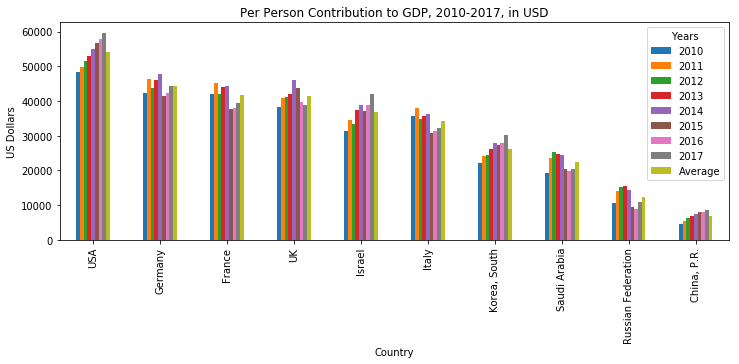

In [32]:
per_person_gdp.plot(kind='bar', title = 'Per Person Contribution to GDP, 2010-2017, in USD', figsize=[12,4])

plt.ylabel('US Dollars')
plt.show()

In [34]:

#per_person_gdp_as_pct['Average']

#for i in range(0,len(country_list)-1):
   # per_person_gdp_as_pct.iloc[i,8] = per_person_gdp_as_pct.iloc[i,:].sum()/8

#pd.options.display.float_format='{:,.7f}'.format 
#per_person_gdp_as_pct.sort_values(by='Average', ascending=False)


In [35]:
#military spending per person
per_person['Average'] = 0
for i in range(0,len(country_list)-1):
    per_person.iloc[i,8] = per_person.iloc[i].sum()/8
    
pd.options.display.float_format='{:,.2f}'.format 
per_person=per_person.sort_values(by='Average', ascending=False)
per_person


,2010,2011,2012,2013,2014,2015,2016,2017,Average
Country,,,,,,,,,
Saudi Arabia,"1,649.71","1,718.64","1,942.42","2,238.14","2,624.14","2,762.79","1,972.78","2,107.38","2,127.00"
Israel,"1,962.47","2,156.03","2,019.15","2,212.25","2,327.21","2,103.43","1,804.58","1,981.48","2,070.82"
USA,"2,262.11","2,286.88","2,185.45","2,027.35","1,919.67","1,863.24","1,862.65","1,879.30","2,035.83"
France,980.25,"1,019.85",943.36,976.49,991.01,858.59,886.25,889.05,943.10
UK,917.48,944.50,910.43,879.65,910.29,823.62,731.42,713.09,853.81
"Korea, South",568.59,623.02,639.65,680.43,745.30,722.83,727.17,767.96,684.37
Germany,571.80,594.81,573.25,565.19,565.75,487.26,507.60,539.85,550.69
Italy,603.25,638.05,564.72,568.01,529.87,425.09,474.61,492.53,537.02
Russian Federation,410.19,490.27,568.05,615.28,589.15,461.60,480.99,460.69,509.53


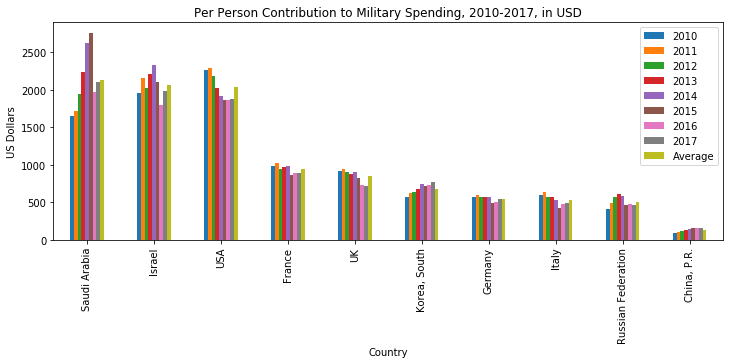

In [36]:
#per person contribution to Military spending expressed in absolute figures

per_person.plot(kind='bar', title = 'Per Person Contribution to Military Spending, 2010-2017, in USD', figsize=[12,4])

plt.ylabel('US Dollars')
plt.show()

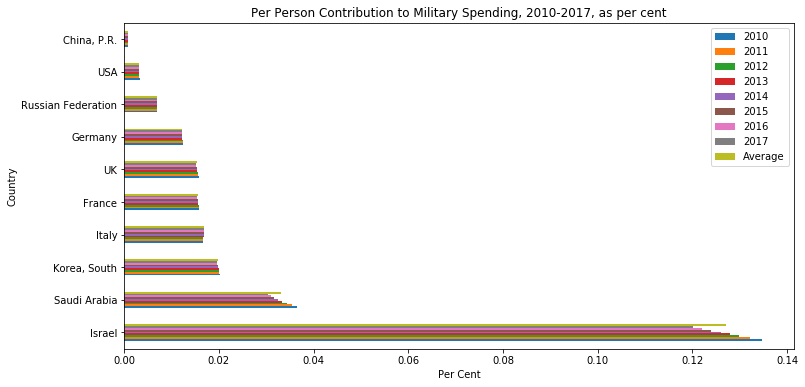

In [25]:
#military spending per person as percent
#per_person is absolute amount each person contributes to military spending in dollars
#per_country is absolute amount each country spends on militry, in millions of dollars

#Since per country is expressed in millions of dollars, we would divide by 1000000. 
#But we want to express result in terms of percent, 
#so multiplying whole thing by 100 to get percent, equals divide by 10000


per_person_as_pct = per_person/per_country

per_person_as_pct['Average'] = 0
for i in range(0,len(country_list)-1):
    per_person_as_pct.iloc[i,8] = per_person_as_pct.iloc[i].sum()/8
    
pd.options.display.float_format='{:,.10f}'.format 

per_person_as_pct= per_person_as_pct.sort_values(by='Average', ascending=False)

per_person_as_pct.plot(kind='barh', title='Per Person Contribution to Military Spending, 2010-2017, as per cent', figsize=[12,6])

plt.xlabel('Per Cent')
plt.show()





In [37]:
#create a new DataFrame using values obtain by running pct_change built in method 
#which calculates difference in terms of percentage from year n to year n-1, so axis = 1

per_country_trend = per_country.pct_change(axis=1)
per_country_trend['Average']=0

#be sure to divide by 7 this time, first year in series has no percentages since there no previous year
for i in range(0,len(country_list)-1):
    per_country_trend.iloc[i,8] = per_country_trend.iloc[i,1:].sum()/7

pd.options.display.float_format='{:,.4f}'.format  
per_country_trend=per_country_trend.sort_values(by='Average', ascending=False)
per_country_trend
#print(per_country_trend.index)



    

,2010,2011,2012,2013,2014,2015,2016,2017,Average
Country,,,,,,,,,
"China, P.R.",nan,0.1923,0.1408,0.1429,0.1161,0.0663,0.0091,0.0565,0.1034
Saudi Arabia,nan,0.0726,0.1642,0.1862,0.2050,0.0795,-0.2697,0.0902,0.0754
"Korea, South",nan,0.1000,0.0310,0.0684,0.1001,-0.0261,0.0099,0.0601,0.0490
Russian Federation,nan,0.1961,0.1599,0.0845,-0.0414,-0.2158,0.0426,-0.0420,0.0263
Israel,nan,0.1198,-0.0474,0.1130,0.0681,-0.0821,-0.1285,0.1154,0.0226
Germany,nan,0.0407,-0.0347,-0.0116,0.0037,-0.1364,0.0444,0.0661,-0.0040
France,nan,0.0456,-0.0707,0.0397,0.0192,-0.1300,0.0364,0.0072,-0.0075
USA,nan,0.0188,-0.0373,-0.0658,-0.0466,-0.0226,0.0067,0.0161,-0.0187
Italy,nan,0.0582,-0.1153,0.0047,-0.0684,-0.1988,0.1151,0.0365,-0.0240


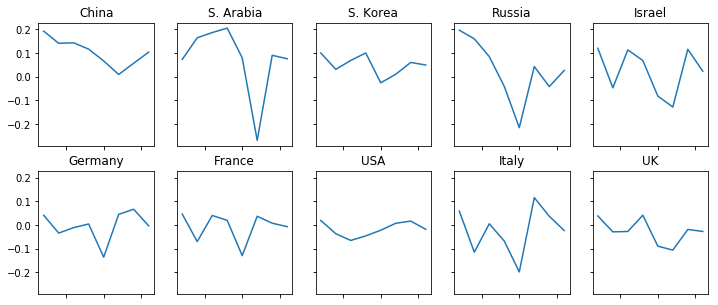

In [38]:
fig, axes = plt.subplots(2,5,sharex=True, sharey=True, figsize=[12,5] )
per_country_trend.loc['China, P.R.'].plot(kind='line', ax=axes[0,0], title='China')
per_country_trend.loc['Saudi Arabia'].plot(kind='line', ax=axes[0,1], title='S. Arabia')
per_country_trend.loc['Korea, South'].plot(kind='line', ax=axes[0,2], title='S. Korea')
per_country_trend.loc['Russian Federation'].plot(kind='line', ax=axes[0,3], title='Russia')
per_country_trend.loc['Israel'].plot(kind='line', ax=axes[0,4], title='Israel')
per_country_trend.loc['Germany'].plot(kind='line', ax=axes[1,0], title='Germany')
per_country_trend.loc['France'].plot(kind='line', ax=axes[1,1], title='France')
per_country_trend.loc['USA'].plot(kind='line', ax=axes[1,2], title='USA')
per_country_trend.loc['Italy'].plot(kind='line', ax=axes[1,3], title='Italy')
per_country_trend.loc['UK'].plot(kind='line', ax=axes[1,4], title='UK')








In [ ]:
per_country['Average'] = per_country.columns.name = "Stat"
per_country.describe()

In [39]:
#per_person_gdp_as_pct
#follows same logic as calculating military spending per person as percent
#per_person_gdp is in dollars, while gdp is in millions of dollars, so we adjust


per_person_gdp_as_pct = per_person_gdp/(gdp*10000)

#per_person_gdp_as_pct = per_person_gdp_as_pct*100


per_person_gdp_as_pct['Average']

for i in range(0,len(country_list)-1):
    per_person_gdp_as_pct.iloc[i,8] = per_person_gdp_as_pct.iloc[i,:].sum()/8

pd.options.display.float_format='{:,.7f}'.format 
per_person_gdp_as_pct.sort_values(by='Average', ascending=False)



Years,2010,2011,2012,2013,2014,2015,2016,2017,Average
Country,,,,,,,,,
Israel,0.0000135,0.0000132,0.0000130,0.0000128,0.0000126,0.0000124,0.0000122,0.0000120,0.0000143
Saudi Arabia,0.0000036,0.0000035,0.0000034,0.0000033,0.0000032,0.0000032,0.0000031,0.0000030,0.0000037
"Korea, South",0.0000020,0.0000020,0.0000020,0.0000020,0.0000020,0.0000020,0.0000020,0.0000020,0.0000022
Italy,0.0000017,0.0000017,0.0000017,0.0000017,0.0000017,0.0000017,0.0000017,0.0000017,0.0000019
France,0.0000016,0.0000016,0.0000016,0.0000016,0.0000016,0.0000016,0.0000015,0.0000015,0.0000018
UK,0.0000016,0.0000016,0.0000016,0.0000015,0.0000015,0.0000015,0.0000015,0.0000015,0.0000017
Germany,0.0000012,0.0000012,0.0000012,0.0000012,0.0000012,0.0000012,0.0000012,0.0000012,0.0000014
Russian Federation,0.0000007,0.0000007,0.0000007,0.0000007,0.0000007,0.0000007,0.0000007,0.0000007,0.0000008
USA,0.0000003,0.0000003,0.0000003,0.0000003,0.0000003,0.0000003,0.0000003,0.0000003,0.0000004
